In [93]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
# Function for polynomial display
# We do not need pay much attention on this part
def plot_polynomial(xmin, xmax, coef, color='C1'):
    #xs is an array of evenly spaced numbers between xmin and xmax
    xs = np.linspace(xmin, xmax, num=500)
    
    #ys is an array, each element is computed as a polynomial function of
    #the corresponding element of xs
    ys = np.zeros_like(xs)
    for p, c in enumerate(coef.flatten()):
        ys += c*np.power(xs, p)
    plt.plot(xs, ys, color=color)

In [95]:
X0 = np.array([[2], [7], [9], [3], [10], [6], [1], [8]])

In [96]:
ones = np.ones_like(X0)

In [97]:
X = np.concatenate((X0, ones), axis=1)

In [98]:
X

array([[ 2,  1],
       [ 7,  1],
       [ 9,  1],
       [ 3,  1],
       [10,  1],
       [ 6,  1],
       [ 1,  1],
       [ 8,  1]])

In [99]:
Y = np.array([[13], [35], [41], [19], [45], [28], [10], [55]])

In [100]:
Y

array([[13],
       [35],
       [41],
       [19],
       [45],
       [28],
       [10],
       [55]])

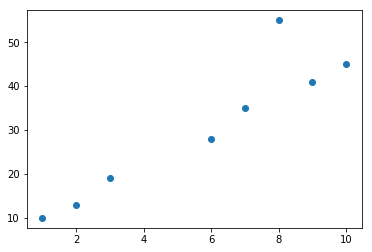

In [101]:
plt.scatter(X0,Y); plt.show()

### Normal Equation

In [102]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))

In [103]:
theta

array([[4.40880503],
       [5.39937107]])

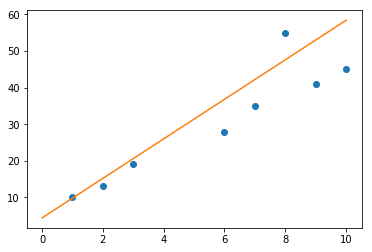

In [104]:
# See how it fits:
plt.scatter(X0, Y)
plot_polynomial(0, 10, theta)
plt.show()

### Gradient Descent

In [105]:
m = X.shape[0]

In [106]:
m

8

In [107]:
theta_gd = np.random.normal(size=2).reshape([2,1])

In [108]:
theta_gd

array([[-1.45366214],
       [ 1.58188137]])

In [109]:
learning_rate = 0.02

In [110]:
def grad_cal(X, Y, theta_gd, m):
    """
    X: X's value
    Y: Y's value
    theta_gd: theta's value
    m: number of samples
    """    
    g = 1/m * X.T.dot(X.dot(theta_gd) - Y)
    return g.reshape(theta_gd.shape)

In [111]:
def loss(X, Y, theta_gd, m):
    """
    X: X's value
    Y: Y's value
    theta_gd: theta's value
    m: number of samples
    """
    return 1/(2*m) * np.sum((X.dot(theta_gd) - Y)**2)

In [120]:
for i in range(10000):
    grad_value = grad_cal(X, Y, theta_gd, m)
    theta_gd = theta_gd - learning_rate*grad_value
    if (i+1)%1000 == 0:
        print(loss(X, Y, theta_gd, m))
    

16.263364779874216
16.263364779874216
16.263364779874216
16.263364779874216
16.263364779874216
16.263364779874216
16.263364779874216
16.263364779874216
16.263364779874216
16.263364779874216


In [121]:
print(theta_gd)

[[4.40880503]
 [5.39937107]]


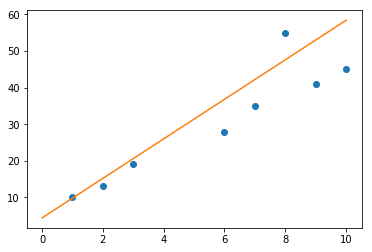

In [122]:
# See how it fits:
plt.scatter(X0, Y)
plot_polynomial(0, 10, theta_gd)
plt.show()

### Predict

In [123]:
def predict(X):
    return X.dot(theta)

In [130]:
X_new_1 = np.array([[20, 1]])

In [131]:
predict(X_new_1)

array([[93.5754717]])

In [132]:
X_new_2 = np.array([[40, 1]])

In [133]:
predict(X_new_2)

array([[181.75157233]])